In [20]:
from keras import models
from keras import layers
from keras.datasets import imdb

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Utility function to vectorize the words in each sequence
def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [23]:
# Loads and prepares data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [24]:
# Checks the maximum word index in training data
print("Maximum word index in training data: ", max([np.max(seq) for seq in train_data]))

Maximum word index in training data:  9999


#### Gets the review comment in English just for reference

In [25]:
# Gets database dictionary
word_index_dict = imdb.get_word_index()

# Reverses the order of key and value pairs to search word against its index found in training data 
index_word_dict = dict([(key, word) for (word, key) in word_index_dict.items()])

In [27]:
# Just checking for training data after joining words after mapping word with its index.
# Note that indices in the training data are offset by 3
' '.join([index_word_dict.get(index-3, '?') for index in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### Preparing data and training model

In [28]:
# Encodes words into vector
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

# Splits data training and validation data sets
validation_data = train_data[15000:]
train_data = train_data[0:15000]

train_labels = train_labels.astype(dtype='float32')
# train_labels = np.asarray(train_labels).astype('float32')
test_labels = test_labels.astype(dtype='float32')
# test_labels = np.asarray(test_labels).astype('float32')

validation_labels = train_labels[15000:]
train_labels = train_labels[0:15000]

In [29]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# Trains model with bath size of 512 and 20 epochs
history = model.fit(train_data, train_labels, batch_size=512, epochs=20, 
                    validation_data=(validation_data, validation_labels))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 51us/step - loss: 0.5052 - accuracy: 0.7910 - val_loss: 0.3773 - val_accuracy: 0.8748
Epoch 2/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.3018 - accuracy: 0.8992 - val_loss: 0.3018 - val_accuracy: 0.8878
Epoch 3/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.2190 - accuracy: 0.9278 - val_loss: 0.2750 - val_accuracy: 0.8941
Epoch 4/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1690 - accuracy: 0.9467 - val_loss: 0.2828 - val_accuracy: 0.8879
Epoch 5/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1387 - accuracy: 0.9563 - val_loss: 0.2860 - val_accuracy: 0.8884
Epoch 6/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.2981 - val_accuracy: 0.8875
Epoch 7/20
15000/15000 [==============================] - 1s 42us/s

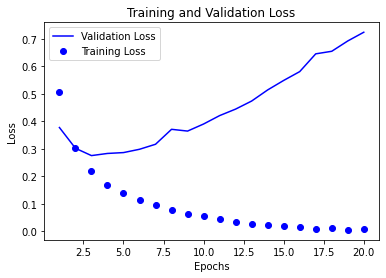

In [31]:
# Evaluates training and validation performance
history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)
validation_losses = history_dict["val_loss"]
training_losses = history_dict["loss"]

plt.plot(epochs, validation_losses, "b", label="Validation Loss")
plt.plot(epochs, training_losses, "bo", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

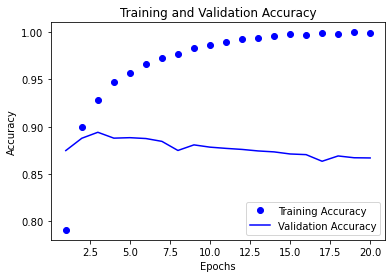

In [32]:
training_accuracies = history_dict["accuracy"]
validation_accuracies = history_dict["val_accuracy"]

plt.clf()
plt.plot(epochs, training_accuracies, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracies, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
# After observing overfitting beyond 4 epochs, model is retrained with 4 epoch only.

history = model.fit(train_data, train_labels, batch_size=512, epochs=4, 
                    validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 41us/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.7544 - val_accuracy: 0.8654
Epoch 2/4
15000/15000 [==============================] - 1s 43us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.7896 - val_accuracy: 0.8642
Epoch 3/4
15000/15000 [==============================] - 1s 46us/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.8232 - val_accuracy: 0.8631
Epoch 4/4
15000/15000 [==============================] - 1s 43us/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.8653 - val_accuracy: 0.8631


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Evaluating model performance

In [82]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 55us/step
Model Performance on Test Data: Loss is  0.9150699216455221  and accuracy is  0.8450400233268738


In [83]:
# Predicting reviews
model.predict(test_data)

array([[7.9205930e-03],
       [9.9999988e-01],
       [1.1920929e-07],
       ...,
       [4.5494694e-01],
       [5.1259995e-05],
       [5.5426657e-03]], dtype=float32)

# Now, consider the above model is baselined and let's experiment with different number hiddent layers, hidden units, optimizers and activation functions.

## Increasing and decreasing hidden layers

#### Increasing hidden layers from 2 to 3

In [84]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 52us/step - loss: 0.5462 - accuracy: 0.7620 - val_loss: 0.4023 - val_accuracy: 0.8674
Epoch 2/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.3162 - accuracy: 0.9014 - val_loss: 0.3060 - val_accuracy: 0.8859
Epoch 3/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.2218 - accuracy: 0.9258 - val_loss: 0.2882 - val_accuracy: 0.8851
Epoch 4/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1678 - accuracy: 0.9455 - val_loss: 0.2790 - val_accuracy: 0.8877
Epoch 5/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1330 - accuracy: 0.9557 - val_loss: 0.3118 - val_accuracy: 0.8826
Epoch 6/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.1028 - accuracy: 0.9677 - val_loss: 0.3170 - val_accuracy: 0.8833


In [85]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 53us/step
Model Performance on Test Data: Loss is  0.34693423069953916  and accuracy is  0.8737199902534485


#### Decreasing hidden layers from 2 to 1

In [86]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 51us/step - loss: 0.4989 - accuracy: 0.7941 - val_loss: 0.3907 - val_accuracy: 0.8659
Epoch 2/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.3152 - accuracy: 0.9054 - val_loss: 0.3207 - val_accuracy: 0.8814
Epoch 3/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.2448 - accuracy: 0.9229 - val_loss: 0.3078 - val_accuracy: 0.8801
Epoch 4/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1999 - accuracy: 0.9392 - val_loss: 0.2760 - val_accuracy: 0.8938
Epoch 5/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1686 - accuracy: 0.9503 - val_loss: 0.2748 - val_accuracy: 0.8918
Epoch 6/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1459 - accuracy: 0.9573 - val_loss: 0.2785 - val_accuracy: 0.8896


In [87]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 54us/step
Model Performance on Test Data: Loss is  0.30089749811172484  and accuracy is  0.8781200051307678


## Increasing and decreasing hidden units

#### Increasing hidden units from 16 to 32

In [88]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 62us/step - loss: 0.5031 - accuracy: 0.7781 - val_loss: 0.3566 - val_accuracy: 0.8782
Epoch 2/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.2825 - accuracy: 0.9042 - val_loss: 0.2884 - val_accuracy: 0.8921
Epoch 3/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.2048 - accuracy: 0.9304 - val_loss: 0.2755 - val_accuracy: 0.8933
Epoch 4/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.1578 - accuracy: 0.9485 - val_loss: 0.3075 - val_accuracy: 0.8763
Epoch 5/6
15000/15000 [==============================] - 1s 48us/step - loss: 0.1250 - accuracy: 0.9591 - val_loss: 0.3065 - val_accuracy: 0.8841
Epoch 6/6
15000/15000 [==============================] - 1s 49us/step - loss: 0.1041 - accuracy: 0.9661 - val_loss: 0.3209 - val_accuracy: 0.8849


In [89]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 60us/step
Model Performance on Test Data: Loss is  0.3442298119544983  and accuracy is  0.8732399940490723


#### Increasing hidden units from 16 to 64

In [90]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 79us/step - loss: 0.4802 - accuracy: 0.7817 - val_loss: 0.3173 - val_accuracy: 0.8844
Epoch 2/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.2556 - accuracy: 0.9057 - val_loss: 0.3117 - val_accuracy: 0.8758
Epoch 3/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.1949 - accuracy: 0.9270 - val_loss: 0.2873 - val_accuracy: 0.8869
Epoch 4/6
15000/15000 [==============================] - 1s 66us/step - loss: 0.1431 - accuracy: 0.9506 - val_loss: 0.2927 - val_accuracy: 0.8895
Epoch 5/6
15000/15000 [==============================] - 1s 69us/step - loss: 0.1125 - accuracy: 0.9613 - val_loss: 0.3211 - val_accuracy: 0.8847
Epoch 6/6
15000/15000 [==============================] - 1s 70us/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.3994 - val_accuracy: 0.8710


In [91]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 2s 74us/step
Model Performance on Test Data: Loss is  0.4535508701610565  and accuracy is  0.8525599837303162


## Using diffrent loss functions

#### Using 'mse' loss function instead of 'binary_crossentropy'

In [92]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 53us/step - loss: 0.1706 - accuracy: 0.7834 - val_loss: 0.1199 - val_accuracy: 0.8753
Epoch 2/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.0931 - accuracy: 0.9053 - val_loss: 0.0928 - val_accuracy: 0.8912
Epoch 3/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.0671 - accuracy: 0.9297 - val_loss: 0.0848 - val_accuracy: 0.8937
Epoch 4/6
15000/15000 [==============================] - 1s 39us/step - loss: 0.0518 - accuracy: 0.9463 - val_loss: 0.0819 - val_accuracy: 0.8938
Epoch 5/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.0428 - accuracy: 0.9568 - val_loss: 0.0830 - val_accuracy: 0.8889
Epoch 6/6
15000/15000 [==============================] - 1s 37us/step - loss: 0.0346 - accuracy: 0.9664 - val_loss: 0.0865 - val_accuracy: 0.8843


In [93]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 52us/step
Model Performance on Test Data: Loss is  0.09658927468061447  and accuracy is  0.8686000108718872


## Using different activtion functions

#### Using 'tanh' activation function instead of 'relu'

In [94]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/6
15000/15000 [==============================] - 1s 54us/step - loss: 0.4782 - accuracy: 0.7935 - val_loss: 0.3582 - val_accuracy: 0.8651
Epoch 2/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.2689 - accuracy: 0.9071 - val_loss: 0.2849 - val_accuracy: 0.8878
Epoch 3/6
15000/15000 [==============================] - 1s 42us/step - loss: 0.1898 - accuracy: 0.9351 - val_loss: 0.3257 - val_accuracy: 0.8658
Epoch 4/6
15000/15000 [==============================] - 1s 38us/step - loss: 0.1460 - accuracy: 0.9499 - val_loss: 0.2964 - val_accuracy: 0.8825
Epoch 5/6
15000/15000 [==============================] - 1s 40us/step - loss: 0.1121 - accuracy: 0.9623 - val_loss: 0.3450 - val_accuracy: 0.8755
Epoch 6/6
15000/15000 [==============================] - 1s 44us/step - loss: 0.0843 - accuracy: 0.9725 - val_loss: 0.3661 - val_accuracy: 0.8772


In [95]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

25000/25000 [==============================] - 1s 55us/step
Model Performance on Test Data: Loss is  0.39115401850700376  and accuracy is  0.8659200072288513
